In [125]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Problema de Valor Inicial (PVI). Método de Euler. Slope field


El problema que queremos resolver es del tipo: $
\begin{cases}
y'(t) = f(t, y) \\
y(t_0) = y_0
\end{cases}
$

Se le llama [**Problema de Valor Inicial**](https://en.wikipedia.org/wiki/Initial_value_problem) frente a [**Problema de Valor de Contorno**](https://en.wikipedia.org/wiki/Boundary_value_problem).

El método de Euler es el método numérico más simple para resolver un PVI. En cada punto $(t_n, y_n)$ calculamos la pendiente $y'(t_n) = f(t_n, y_n)$, y avanzamos en esa dirección un paso $h$:

Método de Euler: $
\begin{cases}
t_{n+1} = t_n + h \\
y_{n+1} = y_n + h f(t_n, y_n)
\end{cases}
$

<img src=https://raw.githubusercontent.com/pranabendra/articles/master/Euler-method/images/Euler.png width="350">

<img src=https://www.jirka.org/diffyqs/html/figures/euler-step12-sol-mbx.svg width="350">


101


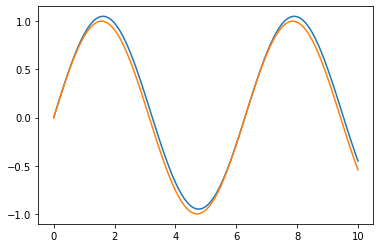

In [135]:
def euler(f, t0=0, t_end=10, y0=0, h=0.1):
    tn, yn = t0, y0
    ts, ys = [t0], [y0]
    for _ in range(int((t_end-t0)/h)):
        yn = yn + h*f(tn, yn)
        tn = tn + h
        ts.append(tn)
        ys.append(yn)
    return ts, ys


# f = lambda t, y: t
# exact = lambda t: np.square(t)/2

f = lambda t, y: np.cos(t) 
exact = lambda t: np.sin(t) 

ts, ys = euler(f, t0=0, t_end=10, y0=0, h=0.1)

print(len(ys))

plt.plot(ts, ys)
plt.plot(ts, exact(ts))  # exact solution

# Runge-Kutta clásico

Muy buen artículo: https://wigglewave.wordpress.com/2012/11/09/intuitive-description-of-runge-kutta-integration/

El método de Runge-Kutta clásico consiste en calcular 4 pendientes $k_1, k_2, k_3, k_4$, calcular la media, y avanzar con ella. 

$
\begin{cases}
t_{n+1} = t_n + h \\
y_{n+1} = y_n + h \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
\end{cases}
$

Las 4 pendientes se calculan evaluando $f$ en cuatro puntos: 


$
k_1 = f(t_n, y_n) \quad \quad \quad \quad \quad \quad \leftarrow \text{pendiente en el punto inicial} \\ 
k_2 = f(t_n + \frac{h}{2}, y_n + h \frac{k_1}{2})  \quad \quad \leftarrow \text{pendiente en el punto medio, avanzando medio paso con Euler} \\ 
k_2 = f(t_n + \frac{h}{2}, y_n + h \frac{k_2}{2})  \quad \quad \leftarrow \text{pendiente en el punto medio, avanzando medio paso usando la pendiente anterior k2} \\
k_3 = f(t_n + h, y_n + h k3)  \quad \quad \leftarrow \text{pendiente en el final del intervalo, avanzando h usando la pendiente k3} 
$



<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/450px-Runge-Kutta_slopes.svg.png width="400">
<img src=https://wigglewave.files.wordpress.com/2012/11/rkexplain_fourspots1.png?w=600&h=510 width="350">



# Runge-Kutta general. Tableros

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

En general podemos construir otros métodos cogiendo las pendientes $k_i$ en distintos lugares. Estos métodos se pueden escribir de manera más compacta en un tablero de Butcher.


In [128]:
def table_EMP():
    c = np.array([0.,1./2.])
    A = np.array([[0.,0.],
                  [1./2.,0.]])
    b = np.array([0.,1.])
    return c, A, b


def table_RK4():
    c = np.array([0.,1./2., 1./2., 1])
    A = np.array([[0.,0.,0.,0.],
                  [1./2.,0.,0.,0.],
                  [0.,1./2.,0.,0.],
                  [0.,0.,1.,0.]])
    b = np.array([1./6.,1./3.,1./3.,1./6.])
    return c, A, b

100
100


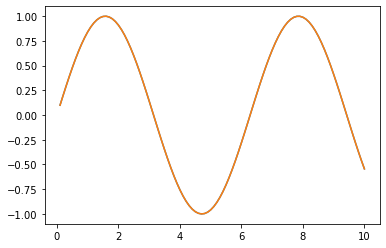

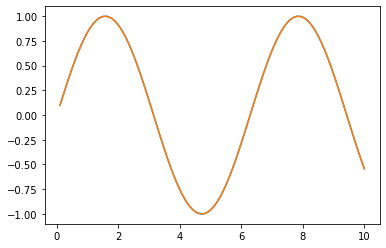

In [136]:
def rungekutta_unidim(f, t0, t_end, y0, h, table):
    tn, yn = t0, y0
    ts, ys = [], []
    c, A, b = table
    s = len(c)   # numero de ki

    for _ in range(int((t_end-t0)/h)):
        k = np.zeros(s)
        
        for i in range(s):
            k[i] = f(tn + c[i]*h, yn + h*np.dot(A[i,:i], k[:i]))
        
        yn = yn + h * np.dot(b, k)
        tn = tn + h
        
        ys.append(yn)
        ts.append(tn)
        
    return ts, ys


# f = lambda t, y: t
# exact = lambda t: np.square(t)/2

f = lambda t, y: np.cos(t) 
exact = lambda t: np.sin(t) 


ts, ys = rungekutta_unidim(f, t0=0, t_end=10, y0=0, h=0.1, table=table_RK4())
print(len(ys))

plt.figure()
plt.plot(ts, ys)
plt.plot(ts, exact(ts))  # exact solution


ts, ys = rungekutta_unidim(f, t0=0, t_end=10, y0=0, h=0.1, table=table_EMP())
print(len(ys))

plt.figure()
plt.plot(ts, ys)
plt.plot(ts, exact(ts))  # exact solution

# Runge-Kutta multidimensional. Sistemas de EDO

Hasta ahora hemos resuelto problemas simples de una sola EDO (en los que la función $f(t,y)$ tenía una sola componente). 

Hay veces que queremos resolver **sistemas de EDO** como el caso de las [**ecuaciones de Lotka-Volterra (presa-predador)**](https://es.wikipedia.org/wiki/Ecuaciones_Lotka%E2%80%93Volterra): 

Ecuaciones Lotka-Volterra: $
\begin{cases}
x'=x(\alpha -\beta y) \\
y'=-y(\gamma -\delta x)
\end{cases}
$

Además, para resolver cualquier **ecuacion diferencial de orden 2 o superior** la podemos [**transformar en un sistema de EDO**](https://www.youtube.com/watch?v=NNhVVk244ZA&list=PLMsYJgjgZE8iBpOBZEsS8PuwNBkwMcjix&index=64):

$
y'' = f(t,y,y') \quad \rightarrow \quad 
\begin{cases}
y' = u \\
u' = f(t,y,u)
\end{cases}
$

En ambos casos tenemos un sistema de EDO (de grado 1) que podemos resolver con el método de Runge-Kutta.

Vamos a modificar nuestro método de Runge-Kutta para que funcione con vectores. Ahora los valores `yn, y0` son vectores de dimensión `d` en vez de escalares, y tenemos un conjunto de pendientes `ki` para cada dimensión, por lo que `k` es ahora una matriz de dimensiones $s \times d$.

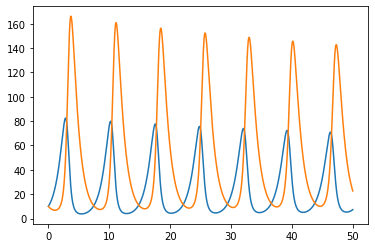

In [138]:
def rungekutta(f, t0, t_end, y0, h, table):
    tn, yn = t0, y0
    ts, ys = [], []
    c, A, b = table 
    s = len(c)   # numero de ki
    d = len(y0)  # dimensiones de los vectores
    for _ in range(int((t_end-t0)/h)):
        k = np.zeros((d,s))
        
        for i in range(s):
            ki = f(tn + c[i]*h, yn + h * np.sum(A[i,:i]*k[:,:i]))
            k[:,i] = ki.reshape(1,d)
        
        yn = yn + h * np.sum(b*k, axis=1)
        tn = tn + h
        
        ys.append(yn)
        ts.append(tn)
        
    return ts, np.array(ys)


### Predator-prey (Lotka–Volterra equations)
# https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations
mu1 = 50  # prey
mu2 = 25  # predator
y0 = np.array([10, 10])
f = lambda t, y: np.array([y[0] * (1 - y[1]/mu1),
                           -y[1] * (1 - y[0]/mu2)]) 


ts, ys = rungekutta(f, t0=0, t_end=50, y0=y0, h=0.01, table=table_RK4())

plt.plot(ts, ys[:,0])
plt.plot(ts, ys[:,1])